# The Probability Mass Function (PMF) - Lab

The class size paradox describes apparent contradictory findings where a total allocation of resources is fixed. 
The idea behind this paradox is that there is a difference in how events are actually distributed and how events are perceived to be distributed. These types of divergence can have important consequences for data analysis. PMFs can help resolve some of these situations as you'll learn below.

## Objectives

You will be able to:

* Understand and explain the class size paradox 
* Use PMFs to visualize actual and biased observations
* Calculate mean from PMFs to identify the expected value


## The Problem 

At a university, the expected student-to-teacher ratio is 10:1. But randomly interviewed students often feel that their average class size is much bigger than 10. There are two main reasons for this:

1. Students typically take 4 - 5 classes at any given time, but teachers usually only teach 1 or 2 classes.
2. The number of students in a small class is small, and the number of students in a large class is large.

Due to the second fact, while randomly taking feedback from students (and sampling randomly), it is expected to come across _more_ students from larger classes.

Let's work through a set of data to recreate and analyze this paradox. 

Suppose that a college offers 74 classes in a term. We can start with the following distribution of sizes and counts:

| Class size |  Class count |
|--------|------|
|15-19|	10|
|20-24|	10|
|25-29|	18|
|30-34|	6|
|35-39|	8|
|40-44|	10|
|45-49|	5|
|50-54|	3|
|55-59| 4|

If the campus manager is inquired about the average class size, he would perform the following tasks:

1. Construct a PMG from given data
2. Compute the mean from calculated PMF

Let's follow the management approach first and see what expected value we get from our PMF. Here is a `size_and_count` dictionary to get you started. Calculate the pmf from this data as we have seen before. To make it slightly more straightforward, we have averaged our class sizes for each class, i.e. for size 15 - 19, we use 17 as an average.

In [1]:
size_and_count = { 17: 10, 22: 10, 
          27: 18, 32: 6, 37: 8, 42: 10, 47: 5, 52: 3, 57: 4 }

Following the approach seen in the previous lesson, calculate the PMG by normalizing each size. 

In [15]:
import numpy as np
size_and_count.values()

dict_values([10, 10, 18, 6, 8, 10, 5, 3, 4])

In [16]:
sizes = np.array(list(size_and_count.keys()))
pmf = np.array([round(value/sum(size_and_count.values()),3 )for value in size_and_count.values()])
sizes, pmf

# ([17, 22, 27, 32, 37, 42, 47, 52, 57],
# [0.135, 0.135, 0.243, 0.081, 0.108, 0.135, 0.068, 0.041, 0.054])

(array([17, 22, 27, 32, 37, 42, 47, 52, 57]),
 array([0.135, 0.135, 0.243, 0.081, 0.108, 0.135, 0.068, 0.041, 0.054]))

As an additional check, these probability values must sum to 1. Let's check for that

In [17]:
# Uncomment the line below, the output should be 1

np.array(pmf).sum()

1.0

## Calculate the Mean or Expected Value $E(X)$

We can now calculate the average of **Expected Value** for this distribution.

>The mean $\mu$ or expected value **E(X)** of a random variable $X$ is the sum of the possible values for $X$ weighted by their respective probabilities.

$$ E(X) = \mu = \sum_i p(x_i)x_i$$

In simple terms, you have to multiply each element in the sizes list to their probability of occurrence. You can do this using a loop.

In [19]:
# Calculate the expected value (mu) using formula above
mu = sum(sizes * pmf)

mu 

# 32.49000000000001

32.49000000000001

So according to the campus manager, the average class size is 27. This makes a lot of sense looking at the calculation above. We can plot a PMF function based on our findings for inspections. 

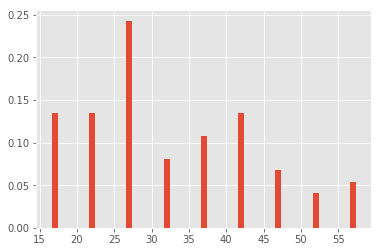

In [26]:
# Plot the pmf , it should look similar to the one shown below
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
plt.bar(sizes, pmf);

## Random Student Survey

Now we performed a survey on a random group of students about size of their classes, and compute the mean, according to the paradox, we observed that the average class is much bigger than 23.7. How did this happen? Let's see this in action below:

First, let's compute a distribution as a likely observation by students, where the probability associated with each class size is “biased” by the number of students in the class. Perform following tasks to introduce this bias. 

* For each class size $x$, multiply the class probability by $x$, the number of students who observe that particular class size
* Get the sum for biased class size sum

The result is a new PMF that represents the biased distribution.

In [30]:
biased = sizes * pmf


biased_sum = round(sum(biased),2)
biased, biased_sum

# ([2.295, 2.97, 6.561, 2.592, 3.996, 5.67, 3.196, 2.132, 3.078], 32.49)

(array([2.295, 2.97 , 6.561, 2.592, 3.996, 5.67 , 3.196, 2.132, 3.078]), 32.49)

You can now normalize the new biased list with the sum of its values, just like you did before. 
- Normalize the biased list and calculate the new PMF

In [35]:
pmf2 = (biased/biased_sum).round(3)

    
sizes, pmf2

# ([17, 22, 27, 32, 37, 42, 47, 52, 57],
# [0.071, 0.091, 0.202, 0.08, 0.123, 0.175, 0.098, 0.066, 0.095])

(array([17, 22, 27, 32, 37, 42, 47, 52, 57]),
 array([0.071, 0.091, 0.202, 0.08 , 0.123, 0.175, 0.098, 0.066, 0.095]))

You can see that probabilities values in this PMF are different than our original pmf. Just like before, you can calulcate the expected value $\mu$.  

In [38]:
mu_biased = sum(sizes * pmf2)

mu_biased
# 36.577000000000005

36.577000000000005

## Here comes the paradox 

Here we see it, the average or expected value of biased results comes out much higher than the actual values. In some situations, a paradox like this can be mind-boggling. As an extra measure, you can inspect both PMFs side by side visually to see the differences. 

* Plot a figure with two axes
* Show pmf1 and pmf2 side by side

Text(0.5, 1.0, 'Probability Mass Function - Observed')

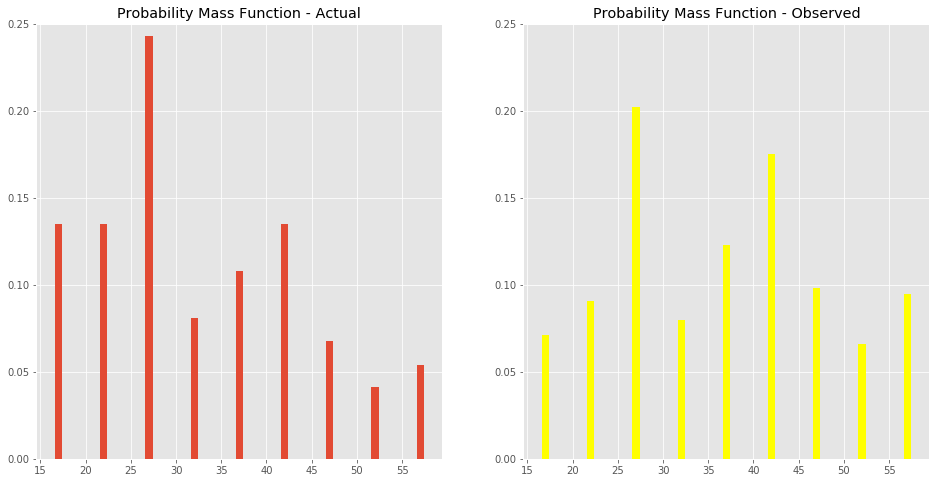

In [81]:
# Plot pmfs side by side

fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(sizes,pmf)
plt.ylim(0,0.25)
plt.title("Probability Mass Function - Actual")

plt.subplot(1,2,2)
plt.bar(sizes,pmf2, color = "yellow")
plt.ylim(0,0.25)
plt.title("Probability Mass Function - Observed")

Your results tell you that in the biased distribution there are fewer small classes and more large classes. 

The mean of the biased distribution is 36.577, which is quite a bit higher than the actual mean (~31.5).

To to an even more direct comparison, plot these pmfs on top of each other and change the parameter `alpha` so you can see both distributions well

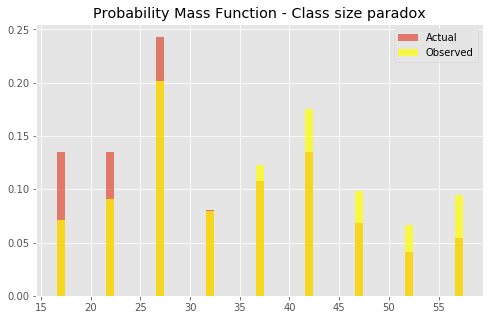

In [10]:
# Plot pmfs overlapping
fig = plt.figure(figsize=(16,8))
plt.bar(sizes,pmf)
plt.ylim(0,0.25)
plt.title("Probability Mass Function - Class Size Paradox")
plt.bar(sizes,pmf2, color = "yellow")
plt.ylim(0,0.25)

Here is the key. For smaller class sizes, the probability of coming across a students is lower than the actual probability. For larger classes, the probability of coming across a student is much higher than actual probability. This explains why the paradox takes place!

## Summary 
In this lesson we looked at a common paradox called a "Class Size Paradox", which deals with differences in observation by different people based on their circumstances. 

Note that this phenomenon is not limited to class sizes, but may also work with other similar scenarios. This paradox can become really complicated due to the large number of involved individuals and huge variations in the probabilities of their observations, based on their settings. 